This is the 2nd notebook for same challenge using traditional approach `(logistic_regression model)`

link to 1st notebook implementation: [Click here](https://www.kaggle.com/code/firojpaudel/cohort-34-challenge)

In [17]:
## Importing everything we might need 

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import re

In [18]:
## Loading the dataset

df= pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [19]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [20]:
## The prev notebook function for text cleaning 
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'<.*?>', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    return text.strip()

## Apply cleaning
df['review'] = df['review'].apply(clean_text)

In [21]:
## Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df["review"], df["sentiment"], test_size=0.2, random_state=42
)

In [22]:
## Feature Extraction 
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [23]:
## Defining the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8934
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



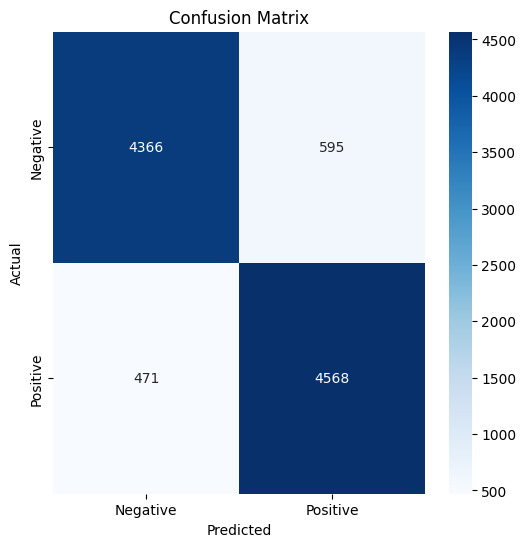

In [25]:
## All visualization codes here

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
labels = {1: 'positive', 0: 'negative'}

In [27]:
## Test reviews: (Same as of prev notebook file)
custom_reviews = [
    "Ahhh, it was meh. Music was good but the action was so bad. Couldn't even bear the whole thing and dropped.", 
    "I love the couple. They are just made for each other", 
    "The pacing of the film is also impeccable. It moves steadily forward, never lingering too long on one plot point, but taking its time to explore the nuances of the characters' internal struggles. The script is sharp, witty, and thought-provoking, offering moments of levity amid the tension, and the score by renowned composer Michael Porter elevates every scene with its hauntingly beautiful orchestral arrangements", 
    "While the cinematography is competent, it doesn’t add much to the film’s overall atmosphere. The bleak and dark tones, which are meant to reflect the impending disaster, become monotonous and uninteresting after a while. Instead of building tension, the visuals start to feel repetitive and uninspired.",
    "The Tale of a Lost Sock: Once upon a time, there was a sock, / Who got lost from its cozy flock. / It slipped and it tripped, / In the laundry it dipped, / And now it just wants to talk! / It said, 'Where is my pair? I feel bare!' / As it roamed the laundry room, through the air.",
    "The film had stunning visuals and a captivating soundtrack, but the storyline was convoluted and the characters lacked depth."
]

In [28]:
custom_reviews_cleaned = [clean_text(review) for review in custom_reviews]
custom_tfidf = vectorizer.transform(custom_reviews_cleaned)
custom_predictions = model.predict(custom_tfidf)
custom_probabilities = model.predict_proba(custom_tfidf)

In [29]:
for review, sentiment, prob in zip(custom_reviews, custom_predictions, custom_probabilities):
    sentiment_text = labels[sentiment]
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment_text} (Confidence: {prob[sentiment]:.2f})\n")

Review: Ahhh, it was meh. Music was good but the action was so bad. Couldn't even bear the whole thing and dropped.
Sentiment: negative (Confidence: 0.94)

Review: I love the couple. They are just made for each other
Sentiment: positive (Confidence: 0.59)

Review: The pacing of the film is also impeccable. It moves steadily forward, never lingering too long on one plot point, but taking its time to explore the nuances of the characters' internal struggles. The script is sharp, witty, and thought-provoking, offering moments of levity amid the tension, and the score by renowned composer Michael Porter elevates every scene with its hauntingly beautiful orchestral arrangements
Sentiment: positive (Confidence: 0.77)

Review: While the cinematography is competent, it doesn’t add much to the film’s overall atmosphere. The bleak and dark tones, which are meant to reflect the impending disaster, become monotonous and uninteresting after a while. Instead of building tension, the visuals start to

and *viola! its done!* 

ofc, the confidience is less than the finetuned model but its simplistic model anyway!

---